In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
data = pd.read_csv('/home/celly/Documents/archive/Bengaluru_House_Data.csv')

data


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [63]:
len(data.location.unique())

1306

# Data cleaning

In [64]:

data.shape

(13320, 9)

In [65]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [66]:
unique_areas = data['area_type'].unique()
print(unique_areas)


['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


In [67]:
df=data.drop(['availability','area_type','society','balcony'],axis='columns')
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [68]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [69]:
df1=df.dropna()
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [70]:
df1.shape

(13246, 5)

In [71]:
unique_size=df1['size'].unique()
print(unique_size)

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK' '10 Bedroom'
 '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom' '14 BHK' '8 BHK'
 '12 Bedroom' '13 BHK' '18 Bedroom']


In [72]:
df1['bhk']=df1['size'].apply(lambda x:int(x.split(' ')[0]))

/tmp/ipykernel_7914/1584357486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bhk']=df1['size'].apply(lambda x:int(x.split(' ')[0]))


In [73]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [74]:
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [75]:
df2=df1.drop(['size'],axis='columns')
df2

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [76]:
df2[df2.bhk>20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [77]:
df2[df2.location=='Whitefield']

,location,total_sqft,bath,price,bhk
5,Whitefield,1170,2.0,38.00,2
10,Whitefield,1800,2.0,70.00,3
11,Whitefield,2785,5.0,295.00,4
27,Whitefield,1610,3.0,81.00,3
47,Whitefield,1459,2.0,94.82,2
...,...,...,...,...,...
13235,Whitefield,1730,3.0,125.00,3
13257,Whitefield,1453,2.0,58.00,3
13258,Whitefield,877,1.0,59.00,1
13299,Whitefield,2830 - 2882,5.0,154.50,4


In [78]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [79]:
df2.head(20)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
5,Whitefield,1170,2.0,38.00,2
6,Old Airport Road,2732,4.0,204.00,4
7,Rajaji Nagar,3300,4.0,600.00,4
8,Marathahalli,1310,3.0,63.25,3
9,Gandhi Bazar,1020,6.0,370.00,6


In [20]:
def is_float(x):
    try:
        float(x)
    except:
           return False
    return True

In [80]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [81]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
        

In [82]:
convert_sqft_to_num('1195')

1195.0

In [83]:
convert_sqft_to_num('1195 - 1440')

1317.5

In [84]:
convert_sqft_to_num('34.46Sq. Meter')


In [85]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)
df3.head(5)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [86]:
df3.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [28]:
# i)clean up the column with interger e.g conversions to floats from ranges
# ii)Handle NAs
# iii)Remove unneccessary features

# Feature Engineering

In [29]:
df4=df3.copy()
df4['price_per_
    sqft']=df4['price']*100000/df4['total_sqft']
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [87]:
len(df4['location'].unique())

242

In [88]:
df4.location=df4.location.apply(lambda x:x.strip())
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
other               2881
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
                    ... 
LB Shastri Nagar      11
Marsur                11
Narayanapura          11
Nehru Nagar           11
HAL 2nd Stage         11
Name: location, Length: 242, dtype: int64

In [89]:
len(location_stats[location_stats<=10])

0

In [90]:
len(df4.location.unique())

242

In [91]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

Series([], Name: location, dtype: int64)

In [92]:
df4.location=df4.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

242

In [93]:
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [94]:
# Example of filtering for rows where 'location' column has the value 'other'
df4[df4['location'] == 'other']


,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.00,6,36274.509804
18,other,2770.0,4.0,290.00,3,10469.314079
19,other,1100.0,2.0,48.00,2,4363.636364
25,other,1250.0,3.0,56.00,3,4480.000000
42,other,600.0,1.0,38.00,1,6333.333333
...,...,...,...,...,...,...
13291,other,812.0,1.0,26.00,1,3201.970443
13292,other,1440.0,2.0,63.93,3,4439.583333
13302,other,1075.0,2.0,48.00,2,4465.116279
13306,other,1200.0,5.0,325.00,4,27083.333333


# outlier removal

In [95]:
df4[df3.total_sqft/df4.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [96]:
df4.shape

(13246, 6)

In [97]:
df5=df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12502, 6)

In [98]:
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [99]:
df4.price_per_sqft.describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [100]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out    
df5=remove_pps_outliers(df4)
df5.shape

(11428, 6)

# Visualization

In [44]:
import matplotlib.pyplot as plt

qA# 

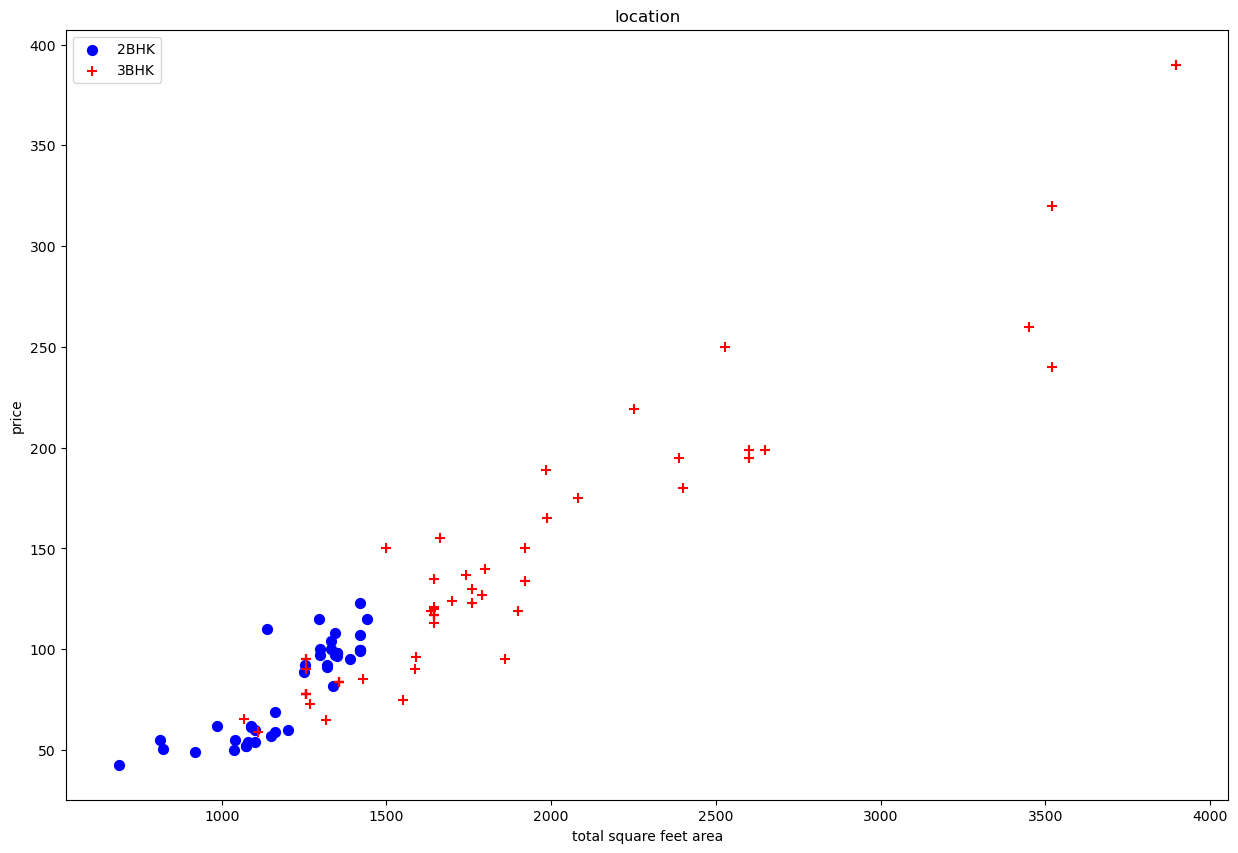

In [45]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='red',label='3BHK',s=50)
    plt.xlabel("total square feet area")
    plt.ylabel("price")
    plt.title("location")
    plt.legend()
    
plot_scatter_chart(df5,'Hebbal')


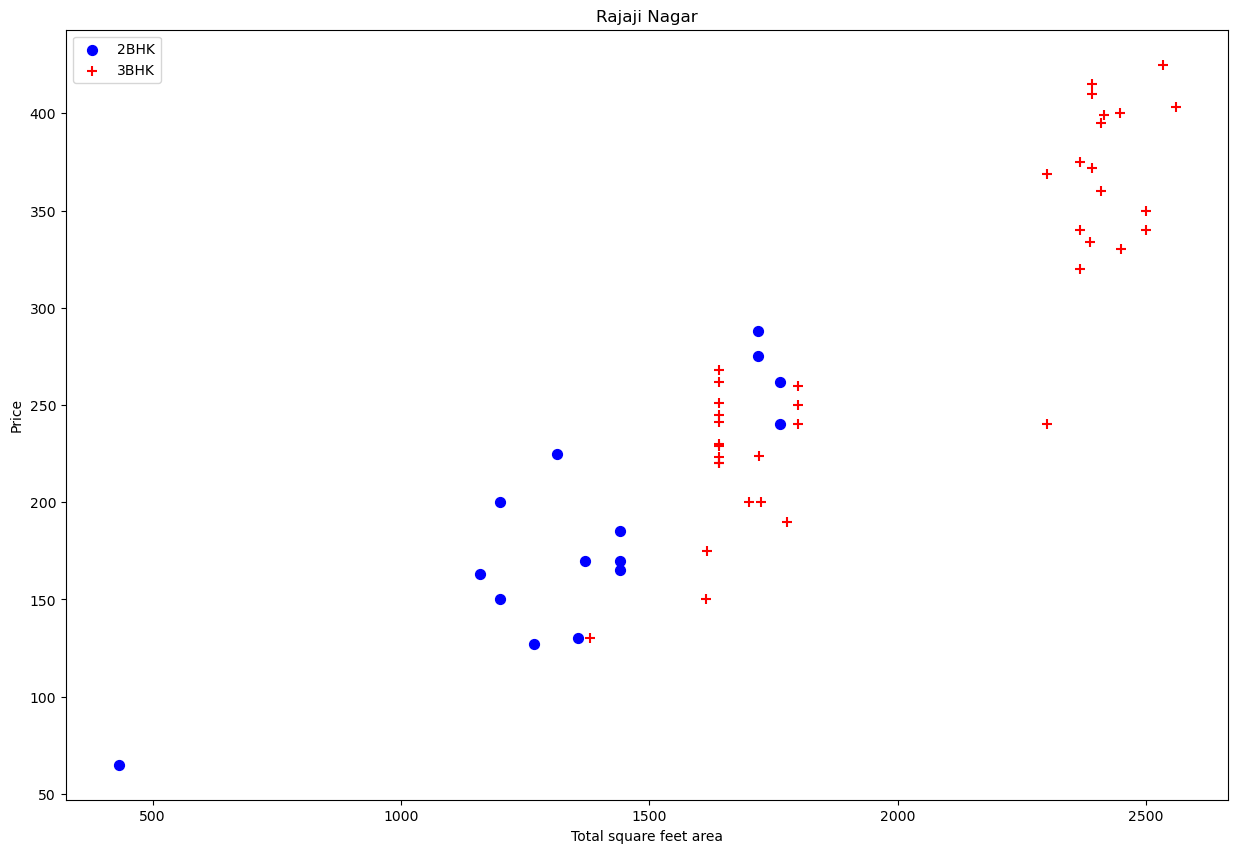

In [46]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.rcParams['figure.figsize'] = (15, 10)  # Corrected key
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='red', label='3BHK', s=50)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

# Call the function
plot_scatter_chart(df5, 'Rajaji Nagar')

# remove 2bk bedrooms whose price is less than the one for 1bk beedrooms

In [101]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df  in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                 'std':np.std(bhk_df.price_per_sqft),
                'count':bh_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
        return df.drop(exclude_indices,axis='index')
    df6=remove_bhk_outliers(df5)
    df6.shape

In [102]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    
    # Move the return statement outside the loops
    return df.drop(exclude_indices, axis='index')

# Call the function and check the shape of the output DataFrame
df6 = remove_bhk_outliers(df5)
df6.shape

(8002, 6)

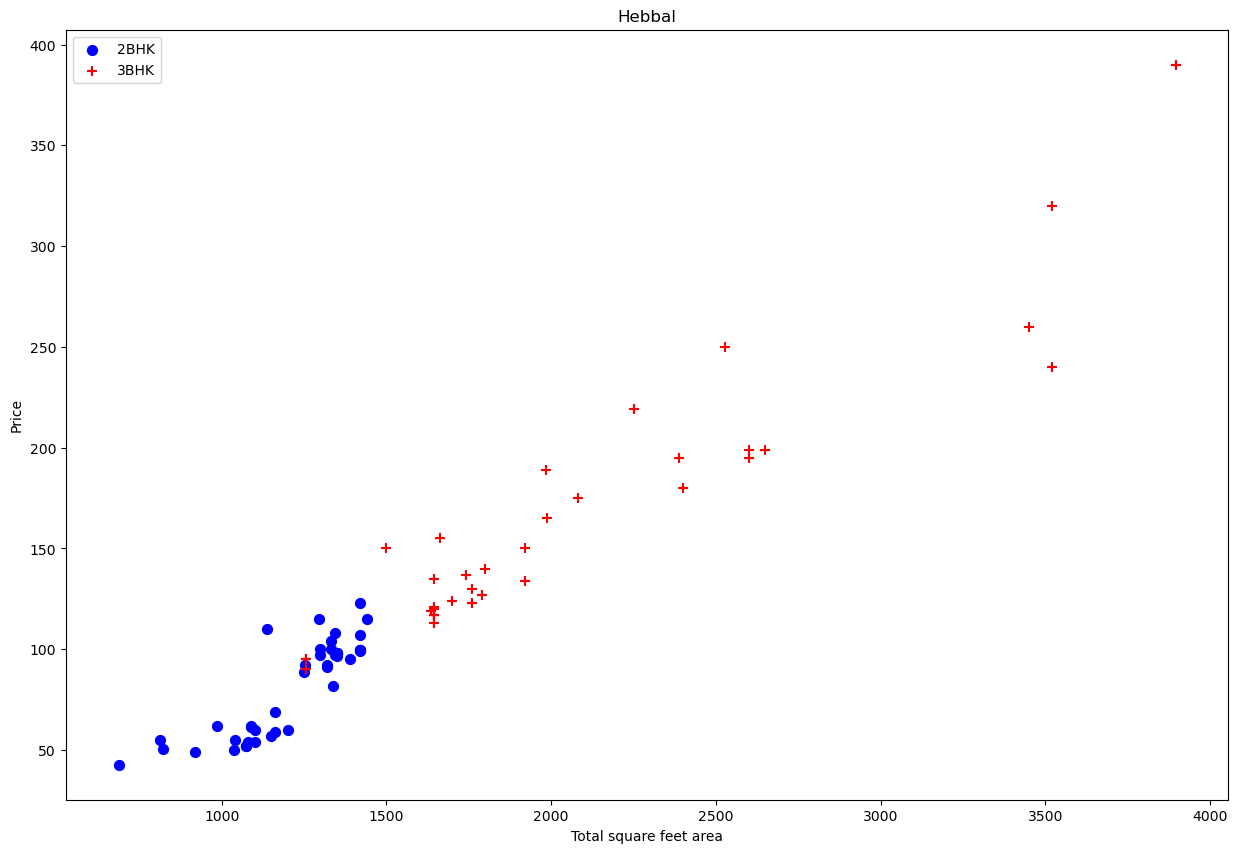

In [49]:

plot_scatter_chart(df6, 'Hebbal')

Text(0, 0.5, 'count')

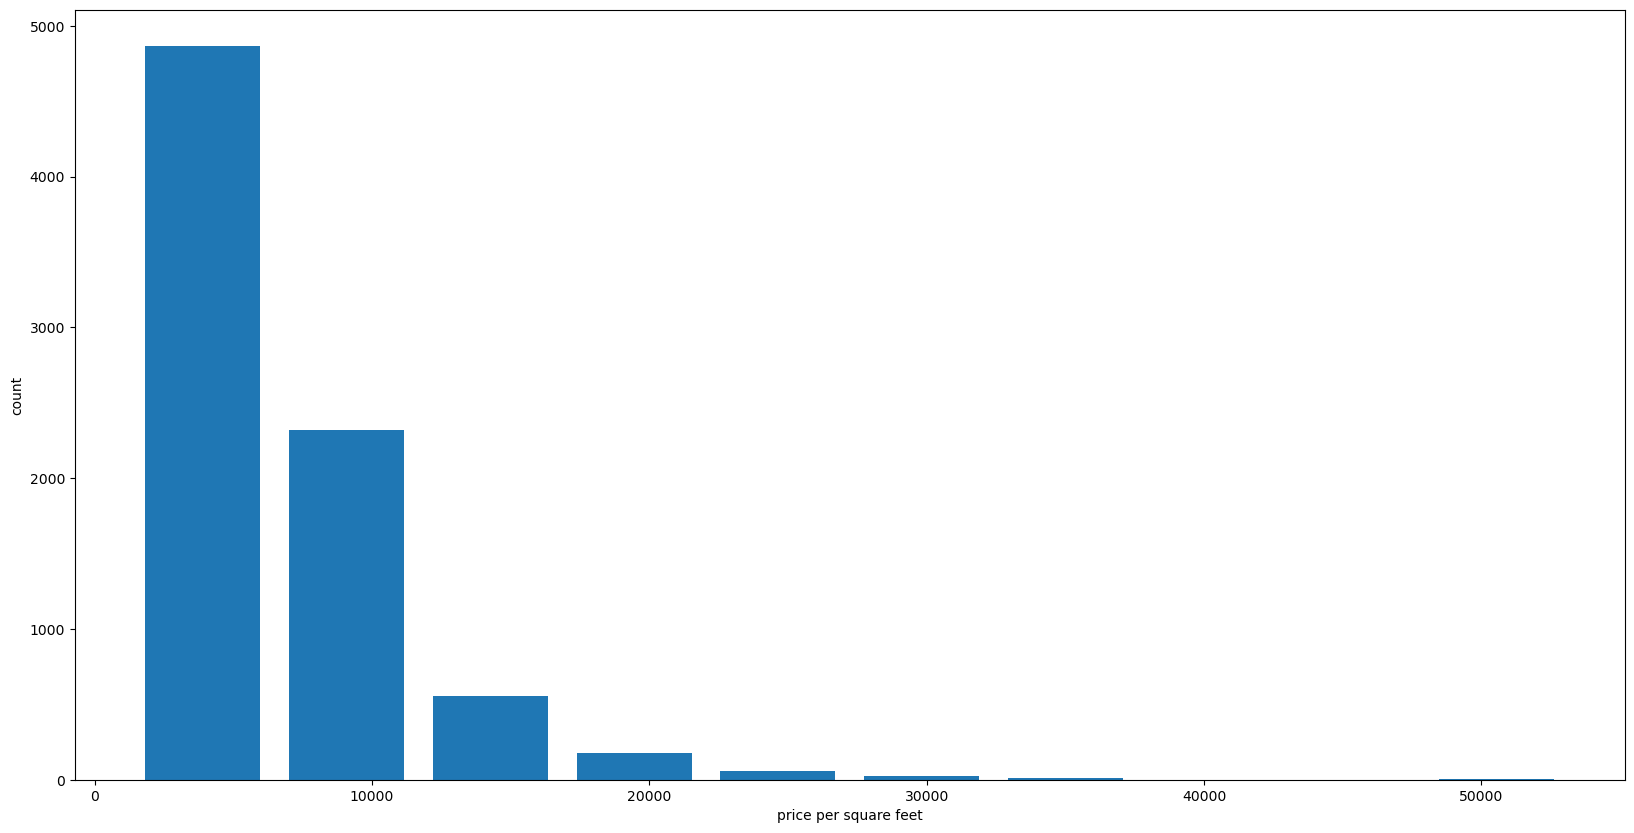

In [50]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("price per square feet")
plt.ylabel("count")

In [103]:
df6.bath.unique()

array([ 4.,  3.,  6.,  2.,  5.,  1.,  8.,  7.,  9., 10., 12., 14., 27.,
       16., 15., 13., 18.])

In [104]:
df6[df6.bath>18]

,location,total_sqft,bath,price,bhk,price_per_sqft
8946,other,8000.0,27.0,230.0,27,2875.0


Text(0, 0.5, 'count')

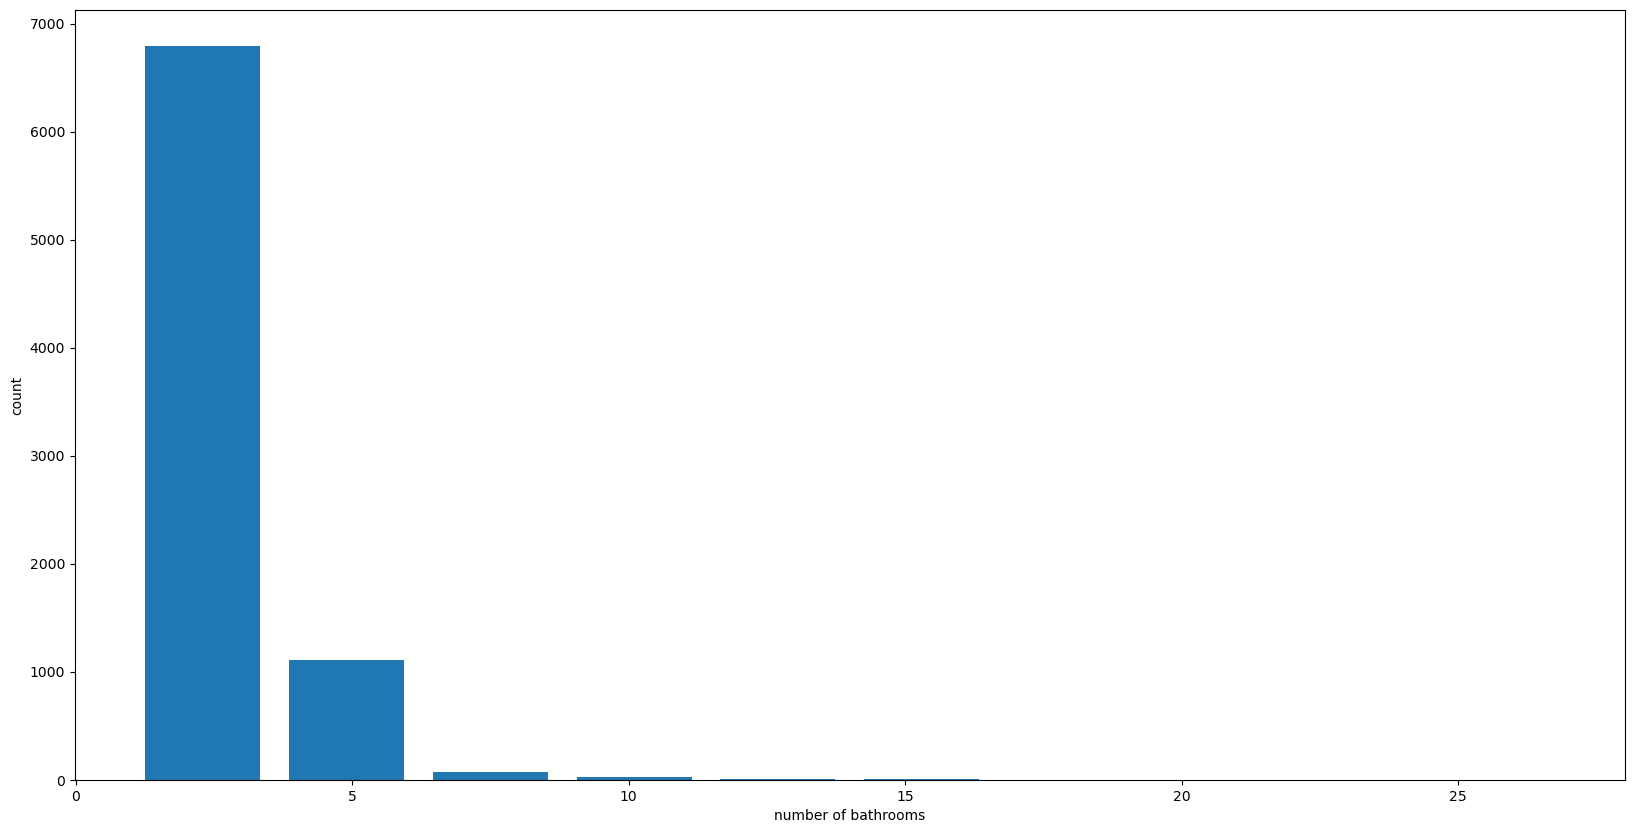

In [105]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("number of bathrooms")
plt.ylabel('count')


In [106]:
df6[df6.bath>df6.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1635,Chamrajpet,1500.0,9.0,230.0,6,15333.333333
1771,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5604,Nagasandra,7000.0,8.0,450.0,4,6428.571429
7229,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8812,other,3300.0,14.0,500.0,9,15151.515152
9007,other,990.0,12.0,120.0,8,12121.212121
10308,other,1850.0,12.0,300.0,8,16216.216216
10693,other,2400.0,6.0,775.0,3,32291.666667
11365,other,7150.0,13.0,3600.0,10,50349.650350


In [107]:
df7=df6[df6.bath<df6.bhk+2]
df7.shape

(7901, 6)

In [108]:
df8=df7.drop('price_per_sqft',axis='columns')
df8

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,125.0,6
3,1st Block Jayanagar,1875.0,2.0,235.0,3
4,1st Block Jayanagar,930.0,4.0,85.0,7
...,...,...,...,...,...
11419,other,1400.0,7.0,218.0,7
11422,other,1353.0,2.0,110.0,2
11423,other,812.0,1.0,26.0,1
11426,other,1200.0,5.0,325.0,4


In [111]:
len(df8.location.unique())

242

In [112]:
dummies=pd.get_dummies(df8.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [113]:
df9=pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')
df9

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1200.0,6.0,125.0,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,930.0,4.0,85.0,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11419,other,1400.0,7.0,218.0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11422,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11423,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11426,other,1200.0,5.0,325.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
df10=df9.drop(['location'],axis='columns')
df10

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,125.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,85.0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11419,1400.0,7.0,218.0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11422,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11423,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11426,1200.0,5.0,325.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
df10.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,125.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df10.shape

In [116]:
x=df10.drop('price',axis='columns')
x.head(5)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
y=df10.price
y

0        428.0
1        194.0
2        125.0
3        235.0
4         85.0
         ...  
11419    218.0
11422    110.0
11423     26.0
11426    325.0
11427    400.0
Name: price, Length: 7901, dtype: float64

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [119]:
x_train.shape

(6320, 244)

In [122]:
from sklearn.linear_model import LinearRegression
lnr= LinearRegression()
lnr.fit(x_train,y_train)

LinearRegression()

In [123]:
lnr.score(x_test,y_test)

0.7717413195189553

In [130]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.5,random_state=5)
score=cross_val_score(LinearRegression(),x,y,cv=cv)
score

array([0.71853371, 0.68817103, 0.6726964 , 0.72998367, 0.63224101])

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())
            ]),
            'params': {
                'regressor__fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', Lasso())
            ]),
            'params': {
                'regressor__alpha': [1, 2],
                'regressor__selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', DecisionTreeRegressor())
            ]),
            'params': {
                'regressor__criterion': ['squared_error', 'friedman_mse'],
                'regressor__splitter': ['best', 'random']
            }
        }
    }
    scores=[]
    cv=cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append(
        {
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_,
        })
    
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.694929,{'regressor__fit_intercept': True}
1,lasso,0.659136,"{'regressor__alpha': 1, 'regressor__selection'..."
2,decision_tree,0.595438,"{'regressor__criterion': 'friedman_mse', 'regr..."


In [142]:
def find_best_model_using_gridsearchcv(x,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                
            }
        },
     'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


def find_best_model_using_gridsearchcv(x,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                
            }
        },
     'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append(
        {
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_,
        })
    
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearchcv(x,y)

/home/celly/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/celly/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/celly/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/home/celly/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/home/celly/anaconda3/lib/python3.

,model,best_score,best_params
0,linear_regression,0.694929,{}
1,lasso,0.620320,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision tree,0.598439,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [159]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    x=np.zeros(len(x.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lnr.predict([x])[0]   

In [160]:
predict_price('1st Phase JP Nagar',1000,2,2)

UnboundLocalError: cannot access local variable 'x' where it is not associated with a value

In [155]:
# Call predict_price with all required arguments
predicted_price = predict_price('1st Phase JP Nagar', 1000, 2, 2, x, lr_clf)
print(f"Predicted price: {predicted_price}")


NameError: name 'lr_clf' is not defined

In [157]:
def predict_price(location, sqft, bath, bhk):
    global x, lnr  # Access global variables

    # Find the index of the location
    try:
        loc_index = np.where(x.columns == location)[0][0]
    except IndexError:
        loc_index = -1  # If location is not found

    # Create an input array
    x_input = np.zeros(len(x.columns))
    x_input[0] = sqft
    x_input[1] = bath
    x_input[2] = bhk

    if loc_index >= 0:
        x_input[loc_index] = 1

    # Predict using the model
    return lnr.predict([x_input])[0]


In [158]:
# Define or train x and lr_clf here
predicted_price = predict_price('1st phase JP Nagar', 1000, 2, 2)
print(f"Predicted price: {predicted_price}")


Predicted price: 124.2524689511649


/home/celly/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [161]:
# Define or train x and lr_clf here
predicted_price = predict_price('1st phase JP Nagar', 1000, 3, 3)
print(f"Predicted price: {predicted_price}")


UnboundLocalError: cannot access local variable 'x' where it is not associated with a value

In [162]:
def predict_price(location, sqft, bath, bhk, x, model):
    # Find the index of the location
    try:
        loc_index = np.where(x.columns == location)[0][0]
    except IndexError:
        loc_index = -1  # If location is not found

    # Create an input array
    x_input = np.zeros(len(x.columns))
    x_input[0] = sqft
    x_input[1] = bath
    x_input[2] = bhk

    if loc_index >= 0:
        x_input[loc_index] = 1

    # Predict using the model
    return model.predict([x_input])[0]


In [163]:
# Call the function with the trained model and feature DataFrame
predicted_price = predict_price('1st Phase JP Nagar', 1000, 2, 2, x, lnr)
print(f"Predicted price: {predicted_price}")


Predicted price: 65.21066026426845


/home/celly/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [165]:
# Define or train x and lr_clf here
predicted_price = predict_price('1st phase JP Nagar', 1000, 3, 3,x,lnr)
print(f"Predicted price: {predicted_price}")


Predicted price: 120.369594659151


/home/celly/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [167]:
import pickle
with open('banglore_home_prices_model.pickle','wb')as f:
    pickle.dump(lnr,f)

In [169]:
import json
columns={
    'data_columns': [col.lower() for col in x.columns]
}
with open("columns.json","w")as f:
    f.write(json.dumps(columns))